In [1]:
! pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importing the required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Function to get the stock data

In [3]:
def stock_data(symbol):
  ticker = yf.Ticker(symbol)
  df = ticker.history(start = "2020-04-27", end = '2020-10-23')
  return df

# Function to create a dataframe for closing price of the required stocks

In [4]:
closing_price = pd.DataFrame()
def closing_price_data(symbol):
  df = stock_data(symbol)
  closing_price['closing price of '+ symbol] = df['Close']

In [5]:
closing_price_data('AAPL')
closing_price_data('MSFT')
closing_price_data('META')

closing_price

,closing price of AAPL,closing price of MSFT,closing price of META
Date,,,
2019-12-20 00:00:00-05:00,68.440269,153.031235,206.300003
2019-12-23 00:00:00-05:00,69.557114,153.031235,206.179993
2019-12-24 00:00:00-05:00,69.623222,153.002090,205.119995
2019-12-26 00:00:00-05:00,71.004570,154.256210,207.789993
2019-12-27 00:00:00-05:00,70.977608,154.538116,208.100006
...,...,...,...
2022-12-13 00:00:00-05:00,145.470001,256.920013,120.150002
2022-12-14 00:00:00-05:00,143.210007,257.220001,121.589996
2022-12-15 00:00:00-05:00,136.500000,249.009995,116.150002


# Sortino Ratio 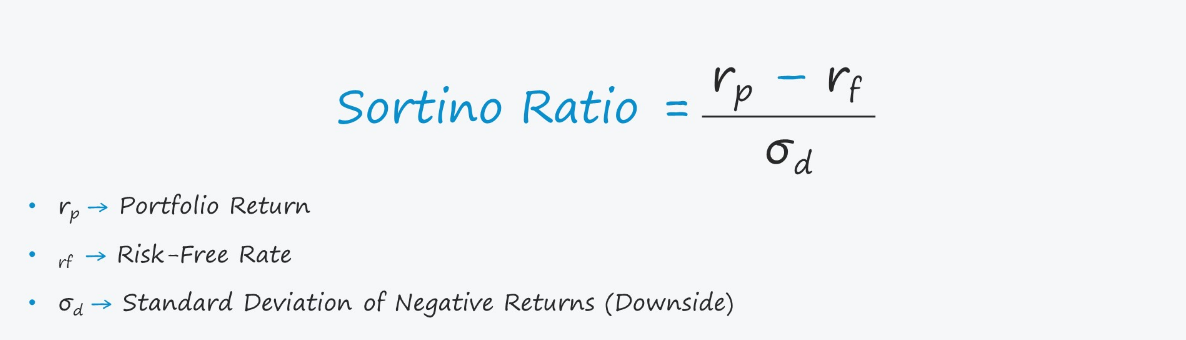

In [6]:
#calculate log returns because they are more accurate with time
log_returns = np.log(1+ closing_price.pct_change()) 

symbols1 = ['AAPL', 'MSFT', 'META']
no_of_symb =3

In [7]:
no_of_portfolios = int(input("Enter no_of_Portfolios:"))

all_weights = np.zeros((no_of_portfolios,no_of_symb))

ret_arr = np.zeros(no_of_portfolios)

sortino_arr = np.zeros(no_of_portfolios)


Enter no_of_Portfolios:100


In [8]:
target_return = int(input("Enter the Target return you want:"))

Enter the Target return you want:1


In [9]:
def sortino_ratio(no_of_portfolios):  
  for ind in range(no_of_portfolios):
    
    weights = np.array(np.random.random(no_of_symb))
    weights  = weights/np.sum(weights)
    
    all_weights[ind, :] = weights
    
    ret_arr[ind] = np.sum(log_returns.mean()*weights*252)
    
    portfolio_return = np.sum(ret_arr[ind]* weights)

    risk_free_rate = 0

    # Calculate the downside deviation
    downside_deviation = np.sqrt(np.mean(np.maximum(0, target_return - ret_arr[ind]) ** 2))

    # Return the Sortino ratio
    sortino_arr[ind] = (portfolio_return - risk_free_rate) / downside_deviation



In [10]:
sortino_ratio(no_of_portfolios)

Required_data = [ret_arr, sortino_arr, all_weights]

Outcomes = pd.DataFrame(data=Required_data).T

Outcomes.columns = ['Returns','Sortino Ratio','Portfolio weights']

Outcomes_df = Outcomes.infer_objects()

print('')
print('#'*80)
print('Portfolio metrics:')
print('#'*80)
display(Outcomes.head())
print('#'*80)


################################################################################
Portfolio metrics:
################################################################################


,Returns,Sortino Ratio,Portfolio weights
0,0.087424,0.095799,"[0.41236057732174863, 0.13533385429371494, 0.4..."
1,0.532836,1.140574,"[0.34409086362487584, 0.5441568334897687, 0.11..."
2,0.061826,0.065901,"[0.053965344308658875, 0.5464854457241075, 0.3..."
3,0.570488,1.328224,"[0.08449268539534034, 0.883213387542303, 0.032..."
4,0.111609,0.125631,"[0.16889582721905583, 0.4451518273075008, 0.38..."


################################################################################
